In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Visualizamos la imagen dada y a partir de la regla externa generada por nostros determinamos los pixeles de interes que nos pueden dar información relevante sobre los colores.

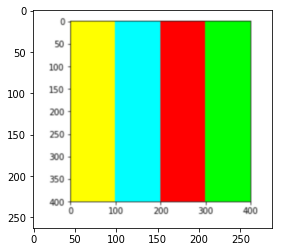

In [5]:
img = cv.imread("res/colores.png",1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, interpolation = 'bicubic')
plt.show()

# Procedemos a sustraer la información de algun pixel en los tres canales para cada color de los 4 presentados, luego los almacenamos en las variables que se ven a continuación

In [15]:
R1=(img[50,60,0])
G1=(img[50,60,1])
B1=(img[50,60,2])
R2=(img[50,120,0])
G2=(img[50,120,1])
B2=(img[50,120,2])
R3=(img[50,180,0])
G3=(img[50,180,1])
B3=(img[50,180,2])
R4=(img[50,240,0])
G4=(img[50,240,1])
B4=(img[50,240,2])

# Creamos una ciclo for anidado que recorre todas las tres matrices al tiempo para cada punto ij, luego condicionamos con activadores condicionales donde se registra un color especifico y donde no

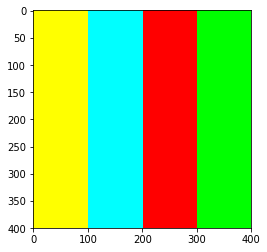

In [19]:
img_add=np.zeros((400,400,3),np.uint8)
for i in range(0,400):
  for j in range(0,400):
    if j <= 100:
      img_add[i,j,0]=R1
      img_add[i,j,1]=G1
      img_add[i,j,2]=B1
    elif j > 100 and j <= 200:
      img_add[i,j,0]=R2
      img_add[i,j,1]=G2
      img_add[i,j,2]=B2
    elif j > 200 and j <= 300:
      img_add[i,j,0]=R3
      img_add[i,j,1]=G3
      img_add[i,j,2]=B3
    
    elif j > 300 and j <= 400:
      img_add[i,j,0]=R4
      img_add[i,j,1]=G4
      img_add[i,j,2]=B4

plt.imshow(img_add)
plt.show()

# Finalmente obtenemos el resultado que es identico a la imagen que nos fue proveida inicialmente